In [1]:
import numpy as np
import statsmodels.formula.api as smf

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from scipy.stats import norm


%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Sampling Theory

Consinder the following two Gaussian (normal) distributions, which we label $G_{black}$ and $G_{red}$.

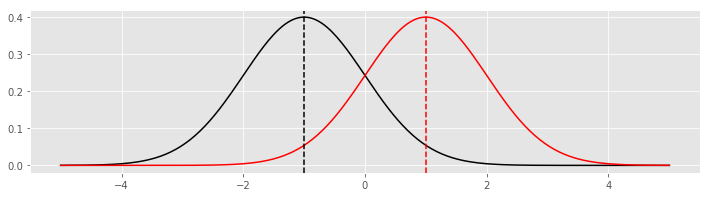

In [8]:
fig, ax = plt.subplots(figsize=(12, 3))

x = np.linspace(-5, 5, num=250)
ax.plot(x, norm(loc=-1).pdf(x), color="black")
ax.plot(x, norm(loc=1).pdf(x), color="red")
ax.axvline(-1, linestyle="--", color="black")
ax.axvline(1, linestyle="--", color="red")

The $G_{black}$ distribution is centered at $\mu_{black} = -1$, and $G_{red}$ is centered at $\mu_{red} = 1$.  The standard deviations of these distributions is some known $\sigma$, and is equal for the two distributions.

You are recieving a stream of data points $x_1, x_2, x_3, \ldots$ which are known to be sample from *either* the black distribution, *or* the red distribution.

1. Given a fixed number of such datapoints, how would you decide from which of the two distributions the data was sampled from.
2. Given your decision rule above, how would you decide how many data points you needed to be sure that the probability you make the *wrong* decision is $\leq 0.05$.

## Trees

In [2]:
def draw_scatter_along_line(ax, y_intercept, slope, sigma, color):
    t = np.linspace(0, 1, 100)
    y = y_intercept + slope * t + np.random.normal(0.0, sigma, size=100)
    ax.scatter(t, y, color=color, s=30)

Consider the following data set, which has two features `x` and `color`, and a reposnse varaible `y`.  The task at hand is to use the two features to predict `y`.

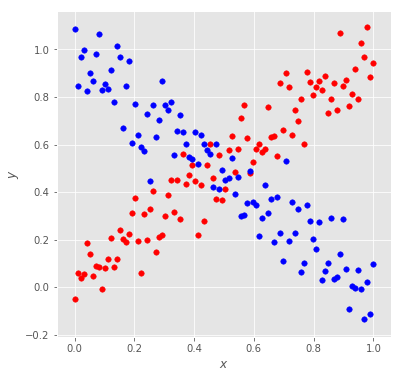

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))

draw_scatter_along_line(ax, 0, 1, 0.1, "red")
draw_scatter_along_line(ax, 1, -1, 0.1, "blue")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

1. What varaible would it be *best* for the regression tree to split on first?
1. What varaible do you think the regression tree will *actually* split on first?
1. How will a regression tree perform at predicting `y` given `color` and `x`?
1. How will a random forest perform at predicting `y` given `color` and `x`?
1. How will a gradient boosting model perform at predicting `y` given `color` and `x`?
1. What model would be appropriate for this data?


## Random Forest

In the previous setup, how would a Random varaible preform in predicting $y$?

## Linear Regression

1. Critique this [statement](https://stats.stackexchange.com/questions/175771/overfitting-with-linear-classifiers/175774#175774):
    
    > Today our professor stated in class that "overfitting with linear classifiers is not possible".
    
1. Can you give an example where a linear model overfits?

Consider the following python code, which creates a class varaible with many levels, and then uses it to fit to random noise:

In [27]:
# Create a catagorical varaible with 100 unique levels, then one hot encode it into
# binary indicators to use in a regression.
factor = np.random.choice(range(100), size=5000, replace=True)
enc = OneHotEncoder()
indicators = enc.fit_transform(factor.reshape(-1, 1))

# Create a response as random noise.
y = np.random.normal(size=5000)

# Fit the regression.
lr = LinearRegression(fit_intercept=False)
lr.fit(indicators, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

3. What are the *correct* coefficients in this linear model (not what this code actually produces)?

4. Why did we *not* fit an intercept term in this regression?

4. How would you describe the fit coefficients that this code actually produces?

4. How would you change the model so that it produces the *correct* coefficients?

## Time Series

1. Why is linear regression not sufficient to model time series data?
1. Why is linear regression *with transformations like splines* not suffiencient to model time series data?
1. Define MA and AR models.  How are they fit to data?
1. Suppose that a time series obeys an MA model.  At some time there is a *shock*, i.e. an unexpected event that causes an extreme value of the series.  How would you expect this extreme value to influence later observations in the series?
1. Suppose that a time series obeys an AR model.  At some time there is a *shock*, i.e. an unexpected event that causes an extreme value of the series.  How would you expect this extreme value to influence later observations in the series?

## Gradient Boosting

1. Explain how a gradient boosting regression tree model work (you may assume I understand how regression trees work).  That is, how does gradient boosting minimize the residual squared error

$$ L = \sum_i (y_i - \hat y_i)^2 $$

2. It's often observed that we could boost *any* model, not just regression trees.  Why are trees a good choice?

3. What would happen if we boosted linear regression models (on one varaible) instead?